In [1]:
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# 1. Load the data.

In [2]:
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('ml-100k/u.user', sep='|', names=u_cols,
                    encoding='latin-1', parse_dates=True) 

r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('ml-100k/u.data', sep='\t', names=r_cols,
                      encoding='latin-1')

m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']
movies = pd.read_csv('ml-100k/u.item', sep='|', names=m_cols, usecols=range(5),
                     encoding='latin-1')

movie_ratings = pd.merge(movies, ratings)
df = pd.merge(movie_ratings, users)

df.head(2)

,movie_id,title,release_date,video_release_date,imdb_url,user_id,rating,unix_timestamp,age,sex,occupation,zip_code
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,4,887736532,60,M,retired,95076
1,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,308,5,887737890,60,M,retired,95076


# Find total number of ratings

In [3]:
print (df.shape)

(100000, 12)


####  There are 100000 ratings in the list

# Do Exploratory data analysis. ( Visualize the data, find min, max ratings etc.)

In [4]:
df.drop(df.columns[[3,4,7]], axis=1, inplace=True)
ratings.drop( "unix_timestamp", inplace = True, axis = 1 ) 
movies.drop(movies.columns[[3,4]], inplace = True, axis = 1 )
#Dropping all the columns that are not really needed
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 9 columns):
movie_id        100000 non-null int64
title           100000 non-null object
release_date    99991 non-null object
user_id         100000 non-null int64
rating          100000 non-null int64
age             100000 non-null int64
sex             100000 non-null object
occupation      100000 non-null object
zip_code        100000 non-null object
dtypes: int64(4), object(5)
memory usage: 7.6+ MB


In [5]:
#Movie Ratings
movie_stats = df.groupby('title').agg({'rating': [np.size, np.mean]})
movie_stats.head()

rating          
                            size      mean
title                                     
'Til There Was You (1997)      9  2.333333
1-900 (1994)                   5  2.600000
101 Dalmatians (1996)        109  2.908257
12 Angry Men (1957)          125  4.344000
187 (1997)                    41  3.024390

In [6]:
print(users.shape)
users.head()

(943, 5)


,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [7]:
users.head()

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [8]:
print(ratings.shape)
ratings.head()

(100000, 3)


,user_id,movie_id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


In [9]:
ratings.head()

,user_id,movie_id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


In [10]:
print(movies.shape)
movies.head()

(1682, 3)


,movie_id,title,release_date
0,1,Toy Story (1995),01-Jan-1995
1,2,GoldenEye (1995),01-Jan-1995
2,3,Four Rooms (1995),01-Jan-1995
3,4,Get Shorty (1995),01-Jan-1995
4,5,Copycat (1995),01-Jan-1995


In [11]:
movies.head()

,movie_id,title,release_date
0,1,Toy Story (1995),01-Jan-1995
1,2,GoldenEye (1995),01-Jan-1995
2,3,Four Rooms (1995),01-Jan-1995
3,4,Get Shorty (1995),01-Jan-1995
4,5,Copycat (1995),01-Jan-1995


# Restrict users who have rated less number of movies to improve the quality of recommendations, Remove outliers

In [12]:
min_50 = movie_stats['rating']['size'] >= 50
movie_stats[min_50].sort_values([('rating', 'mean')], ascending=False).head()

rating          
                                                     size      mean
title                                                              
Close Shave, A (1995)                                 112  4.491071
Schindler's List (1993)                               298  4.466443
Wrong Trousers, The (1993)                            118  4.466102
Casablanca (1942)                                     243  4.456790
Wallace & Gromit: The Best of Aardman Animation...     67  4.447761

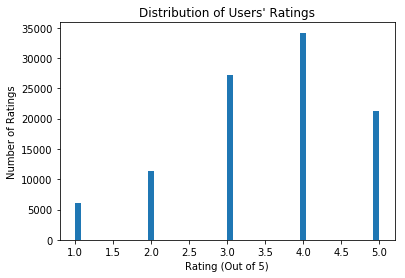

In [13]:
ratings.rating.plot.hist(bins=50)
plt.title("Distribution of Users' Ratings")
plt.ylabel('Number of Ratings')
plt.xlabel('Rating (Out of 5)');

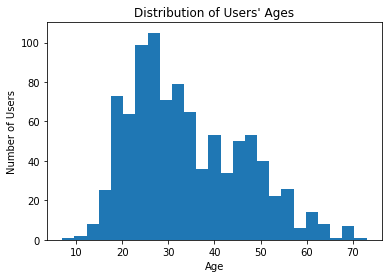

In [14]:
# Raters' Age Distribution
users.age.plot.hist(bins=25)
plt.title("Distribution of Users' Ages")
plt.ylabel('Number of Users')
plt.xlabel('Age');

# 6. Calculate the density of the rating matrix.

In [15]:
col_names = ['user_id', 'item_id', 'rating', 'timestamp']
data = pd.read_table('ml-100k/u.data', names=col_names)
data = data.drop('timestamp', 1)

In [16]:
number_ratings = len(data)
number_movies = len(np.unique(data['item_id']))
number_users = len(np.unique(data['user_id']))

In [17]:
density = (float(number_ratings) / (number_movies * number_users) ) *100
print density

6.30466936422


# 7. Divide the data in training and testing part in the ratio 75:25.

In [18]:
n_users = ratings.user_id.unique().shape[0]
n_items = ratings.movie_id.unique().shape[0]

In [19]:
trainRMSE = []
testRMSE = []

In [20]:
from sklearn import cross_validation as cv
train_data, test_data = cv.train_test_split(data, test_size=0.25)

/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# 8. Collaborative Filtering

 ### * Item Based 
 ### * User Based

In [21]:
#Create two user-item matrices, one for training and another for testing

train_data_matrix = np.zeros((n_users, n_items))
for line in train_data.itertuples():
        train_data_matrix[line[1]-1, line[2]-1] = line[3]
        
        
test_data_matrix = np.zeros((n_users, n_items))
for line in test_data.itertuples():
        test_data_matrix[line[1]-1, line[2]-1] = line[3] 

In [22]:
from sklearn.metrics.pairwise import pairwise_distances 
epsilon=1e-9
user_similarity = (1-pairwise_distances(test_data_matrix, metric='cosine')) + epsilon
item_similarity = (1-pairwise_distances(test_data_matrix.T, metric='cosine')) + epsilon

In [23]:
def predict(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        #We use np.newaxis so that mean_user_rating has same format as ratings
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred

In [24]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#Definition to calculate the root mean squared error.
def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten()
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, ground_truth))

In [25]:
##Find the top-k movie names based on the ordered ratings
##
def top_k_movies_byuser(prediction, mapper, user_idx, k=10):
    return [mapper[x] for x in np.argsort(prediction[user_idx,np.where(train_data_matrix[user_idx, :] == 0)[0]])[:-k-1:-1]]

In [26]:
# Load movie data
idx_to_movie = {}
with open('ml-100k/u.item', 'r') as f:
    for line in f.readlines():
        info = line.split('|')
        idx_to_movie[int(info[0])-1] = info[1]

In [27]:
user_prediction = predict(test_data_matrix, user_similarity, type='user')
item_prediction = predict(test_data_matrix, item_similarity, type='item')

In [28]:
user_idx = 116

In [29]:
userBasedTrainRMSE = rmse(user_prediction, train_data_matrix)
userBasedTestRMSE = rmse(user_prediction, train_data_matrix)

In [30]:
trainRMSE.append(userBasedTrainRMSE)
testRMSE.append(userBasedTestRMSE)

In [31]:
print 'User-based CF MSE on train data: ' + str(userBasedTrainRMSE)
print 'User-based CF MSE on train data: ' + str(userBasedTestRMSE)+"\n"
print "Movies recommended to user " + str(user_idx) + " are:"
nearestMovies = top_k_movies_byuser(user_prediction, idx_to_movie, user_idx)
print str(nearestMovies)  + "\n"

User-based CF MSE on train data: 3.45427508656
User-based CF MSE on train data: 3.45427508656

Movies recommended to user 116 are:
['Eat Drink Man Woman (1994)', 'Graduate, The (1967)', 'Dirty Dancing (1987)', 'Unbearable Lightness of Being, The (1988)', 'Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)', 'Cold Comfort Farm (1995)', 'So I Married an Axe Murderer (1993)', 'Basic Instinct (1992)', 'Independence Day (ID4) (1996)', 'Maverick (1994)']



In [32]:
itemBasedTrainRMSE = rmse(item_prediction, train_data_matrix)
itemBasedTestRMSE = rmse(item_prediction, test_data_matrix)
trainRMSE.append(itemBasedTrainRMSE)
testRMSE.append(itemBasedTestRMSE)

In [33]:
print 'Item-based CF MSE on test data: ' + str(itemBasedTrainRMSE)
print 'Item-based CF MSE on test data: ' + str(itemBasedTestRMSE)+"\n"
print "Movies recommended to user " + str(user_idx) + " are:"
 
nearestMovies = top_k_movies_byuser(item_prediction, idx_to_movie, user_idx)
print str(nearestMovies)  + "\n"

Item-based CF MSE on test data: 3.52224486556
Item-based CF MSE on test data: 3.30223294924

Movies recommended to user 116 are:
['Powder (1995)', 'Hear My Song (1991)', 'Don Juan DeMarco (1995)', 'Life with Mikey (1993)', 'Yankee Zulu (1994)', 'Pollyanna (1960)', 'To Live (Huozhe) (1994)', 'Everyone Says I Love You (1996)', 'War Room, The (1993)', 'Lightning Jack (1994)']



## User Based CF has lower Mean Square Error as compared to Item Based

# ------ #

# Using SFrame 

In [34]:
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings_train = pd.read_csv('ml-100k/ua.base', sep='\t', names=r_cols, encoding='latin-1')
ratings_test = pd.read_csv('ml-100k/ua.test', sep='\t', names=r_cols, encoding='latin-1')
ratings_train.shape, ratings_test.shape

((90570, 4), (9430, 4))

In [35]:
!pip install turicreate

grin 1.2.1 requires argparse>=1.1, which is not installed.
mxnet 1.1.0.post0 has requirement numpy<1.15.0,>=1.8.2, but you'll have numpy 1.15.1 which is incompatible.
mxnet 1.1.0.post0 has requirement requests<2.19.0,>=2.18.4, but you'll have requests 2.19.1 which is incompatible.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [36]:
import turicreate
train_data = turicreate.SFrame(ratings_train)
test_data = turicreate.SFrame(ratings_test)

In [37]:
popularity_model = turicreate.popularity_recommender.create(train_data, user_id='user_id', item_id='movie_id', target='rating')

Warning: Ignoring columns unix_timestamp;

To use these columns in scoring predictions, use a model that allows the use of additional features.

Preparing data set.

Data has 90570 observations with 943 users and 1680 items.

Data prepared in: 0.13925s

90570 observations to process; with 1680 unique items.

In [38]:
popularity_recomm = popularity_model.recommend(users=[1,2,3,4,5],k=5)
popularity_recomm.print_rows(num_rows=25)

+---------+----------+-------+------+
| user_id | movie_id | score | rank |
+---------+----------+-------+------+
|    1    |   1599   |  5.0  |  1   |
|    1    |   1201   |  5.0  |  2   |
|    1    |   1189   |  5.0  |  3   |
|    1    |   1122   |  5.0  |  4   |
|    1    |   814    |  5.0  |  5   |
|    2    |   1599   |  5.0  |  1   |
|    2    |   1201   |  5.0  |  2   |
|    2    |   1189   |  5.0  |  3   |
|    2    |   1122   |  5.0  |  4   |
|    2    |   814    |  5.0  |  5   |
|    3    |   1599   |  5.0  |  1   |
|    3    |   1201   |  5.0  |  2   |
|    3    |   1189   |  5.0  |  3   |
|    3    |   1122   |  5.0  |  4   |
|    3    |   814    |  5.0  |  5   |
|    4    |   1599   |  5.0  |  1   |
|    4    |   1201   |  5.0  |  2   |
|    4    |   1189   |  5.0  |  3   |
|    4    |   1122   |  5.0  |  4   |
|    4    |   814    |  5.0  |  5   |
|    5    |   1599   |  5.0  |  1   |
|    5    |   1201   |  5.0  |  2   |
|    5    |   1189   |  5.0  |  3   |
|    5    | 

In [39]:
#Training the model
item_sim_model = turicreate.item_similarity_recommender.create(train_data, user_id='user_id', item_id='movie_id', target='rating', similarity_type='cosine')

#Making recommendations
item_sim_recomm = item_sim_model.recommend(users=[1,2,3,4,5],k=10)
print ('Top 10 recommendations for User Id 1-5 are:')
item_sim_recomm.print_rows(num_rows=50)

Warning: Ignoring columns unix_timestamp;

To use these columns in scoring predictions, use a model that allows the use of additional features.

Preparing data set.

Data has 90570 observations with 943 users and 1680 items.

Data prepared in: 0.11748s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 5.66ms                         | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 20.36ms                             | 0.75             | 12              |

| 191.361ms                           | 100              | 1680            |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 1.21686s

Top 10 recommendations for User Id 1-5 are:
+---------+----------+----------------+------+
| user_id | movie_id |     score      | rank |
+---------+----------+----------------+------+
|    1    |   423    | 0.982942669901 |  1   |
|    1    |   202    | 0.950693345024 |  2   |
|    1    |   655    | 0.81341996425  |  3   |
|    1    |   403    | 0.762677106694 |  4   |
|    1    |   568    | 0.753886705136 |  5   |
|    1    |   385    | 0.721102100747 |  6   |
|    1    |   265    | 0.649319145516 |  7   |
|    1    |   393    | 0.61768293813  |  8   |
|    1    |   357    | 0.565342843533 |  9   |
|    1    |   483    | 0.481508892684 |  10  |
|    2    |    50    | 1.12562584877  |  1   |
|    2    |   181    | 1.03206492846  |  2   |
|    2    |   121    | 0.88810939743  |  3   |
|    2    |    9     | 0.851821605976 |  4   |
|    2    |   117    | 0.792605129572 |  5   |
|    2    |    56    | 0.683163503042 |  6   |
|    2    |   405    | 0.667770553094 |  7   |
|    2    |   74

# SVD 

In [40]:
import scipy.sparse as sp
from scipy.sparse.linalg import svds

In [41]:
#get SVD components from train matrix. Choose k.
u, s, vt = svds(train_data_matrix, k = 30)
s_diag_matrix=np.diag(s)
X_pred = np.dot(np.dot(u, s_diag_matrix), vt)

In [42]:
modelBasedTrainRMSE = rmse(X_pred, train_data_matrix)
modelBasedTestRMSE = rmse(X_pred, test_data_matrix)
trainRMSE.append(modelBasedTrainRMSE)
testRMSE.append(modelBasedTestRMSE)

In [43]:
print 'Model-based CF MSE on train data: ' + str(modelBasedTrainRMSE)
print 'Model-based CF MSE on test data: ' + str(modelBasedTestRMSE) + "\n"
 

Model-based CF MSE on train data: 2.27254612551
Model-based CF MSE on test data: 2.79249610657



In [44]:
print "Movies recommended to user " + str(user_idx) + " are:"
nearestMovies = top_k_movies_byuser(X_pred, idx_to_movie, user_idx)
print str(nearestMovies) + "\n"

Movies recommended to user 116 are:
['Eat Drink Man Woman (1994)', 'Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)', 'George of the Jungle (1997)', 'So I Married an Axe Murderer (1993)', 'Mimic (1997)', 'Maverick (1994)', 'Graduate, The (1967)', 'Angels and Insects (1995)', 'Unbearable Lightness of Being, The (1988)', 'Citizen Kane (1941)']



In [45]:
# Compare true ratings of user with predictions
ratings = pd.DataFrame(columns = ("Actual Rating","Predicted Rating"))
ratings["Actual Rating"] = train_data_matrix[user_idx,np.where(train_data_matrix[user_idx, :] > 0)[0]][0:5]
ratings["Predicted Rating"] = X_pred[user_idx,np.where(train_data_matrix[user_idx, :] > 0)[0]][0:5]
print ratings

   Actual Rating  Predicted Rating
0            4.0          3.259840
1            5.0          3.148699
2            5.0          1.156492
3            5.0          1.025904
4            4.0          1.461513


# RMSE in the model based CF is not any better than the memory based model. Another big issue with the matrix factorization approach is that it does not work well with missing data.MovieLens dataset that is considered in this script has no Nan/missing values and thus the SVD worked.

# Model Comparision

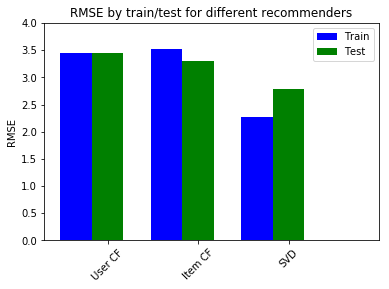

In [46]:
import numpy as np
import matplotlib.pyplot as plt
 
fig = plt.figure()
ax = fig.add_subplot(111)
 
## the data
N = 3
## necessary variables
ind = np.arange(N)                # the x locations for the groups
width = 0.35                      # the width of the bars
 
## the bars
rects1 = ax.bar(ind, trainRMSE, width,color='blue')
 
rects2 = ax.bar(ind+width, testRMSE, width, color='green')
 
# axes and labels
ax.set_xlim(-width,len(ind)+width)
ax.set_ylim(0,4)
ax.set_ylabel('RMSE')
ax.set_title('RMSE by train/test for different recommenders')
xTickMarks = ['User CF','Item CF','SVD']
ax.set_xticks(ind+width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=45, fontsize=10)
## add a legend
ax.legend( (rects1[0], rects2[0]), ('Train', 'Test') )
plt.show()


# Conclusion : 
    User Collaborative Filtering gave a good Train - Test Score
    Singular Value Decomposition gave a Test Score better than the Train Score. 
    